In [1]:
import nibabel as nib
from nibabel.testing import data_path
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML
import dicom


realigned_atlas = nib.load('../Data/big_atlas/coregistered_pig_2_atlas.nii').get_data()
original_atlas = nib.load('../Data/big_atlas/atlas.nii').get_data()
anatomical = nib.load('../Data/pig_2/coregistered_anatomy.nii').get_data()
mean_fmri = nib.load('../Data/pig_2/rfmri nii/meanus822-0016-00001-000001-01.nii').get_data()
fmri_volume = nib.load('../Data/pig_2/rfmri nii/aus822-0016-00001-005661-01.nii').get_data()


In [2]:
# new_atlas = 100 * original_atlas.astype('uint16')
# old_affine =  nib.load('../Data/big_atlas/atlas_original.nii').affine
# old_header = nib.load('../Data/big_atlas/atlas_original.nii').header
# old_header['datatype'] = 512
# old_header['bitpix'] = 16
# img = nib.Nifti1Image(new_atlas, old_affine, header=old_header)
# nib.save(img,'../Data/big_atlas/100_scaled_atlas.nii')


In [3]:
print(realigned_atlas.shape)
print(anatomical.shape)
print(mean_fmri.shape)
print(original_atlas.shape)

(128, 128, 20)
(128, 128, 20)
(128, 128, 20)
(560, 535, 480)


In [4]:
print("List of all warped ROI labels:")
print(np.unique(realigned_atlas))
print("List of all valid ROI labels:")
original_atlas_values = np.unique(original_atlas)
print(original_atlas_values)
print("Lost ROI Labels:")
mask = np.isin(original_atlas_values, realigned_atlas, invert=True)
print(original_atlas_values[mask])

print("# Pixels Lost in Dorsal_motor_nucleus_of_vagus (78)")
print(str(len(np.where( original_atlas == 78 )[1])) + ' / 137000000')

print("# Pixels Lost in Dorsal_motor_nucleus_of_vagus (79)")
print(str(len(np.where( original_atlas == 79 )[1]))+ ' / 137000000')

print("# Pixels Lost in Motor_trigeminal_nucleus (81)")
print(str(len(np.where( original_atlas == 81 )[1]))+ ' / 137000000')

print("# Pixels Lost in Abducens Nucleus (84)")
print(str(len(np.where( original_atlas == 84 )[1]))+ ' / 137000000')

print("# Pixels Lost in Abducens Nucleus (85)")
print(str(len(np.where( original_atlas == 85 )[1]))+ ' / 137000000')

print("# Pixels Lost in Hypoglossal_nucleus (88)")
print(str(len(np.where( original_atlas == 88 )[1]))+ ' / 137000000')

print("# Pixels Lost in Hypoglossal_nucleus (89)")
print(str(len(np.where( original_atlas == 89 )[1]))+ ' / 137000000')

print("# Pixels Lost in Ectosplenial_area (126)")
print(str(len(np.where( original_atlas == 126 )[1]))+ ' / 137000000')

List of all warped ROI labels:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  80  82  83  86  87  90  91  92  93  94  95  96
  97  98 101 104 105 106 109 110 111 113 117 118 119 120 121 122 123 124
 127 129 131 132 134 135 136 137 141 149 151 161 162 163 164 165 166 167
 168 169 170 171 181 183 184 185 186 187 188 189 190 191 192 193 201 204
 205 206 209 210 211 213 217 218 219 220 221 222 223 224 226 227 229 231
 232 234 235 236 237 241 249 251]
List of all valid ROI labels:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60 

[[[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 [[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 [[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 ..., 
 [[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 [[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 [[-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., 

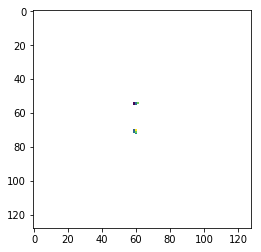

In [10]:
roi_1 = [36,37] # Hippocampus
roi_2 = [40,41] #Amygdala

#######

for slice_i in range(realigned_atlas.shape[2]):
    mask_roi_1 = np.ma.masked_where(np.isin(realigned_atlas, roi_1, invert=True), realigned_atlas)
    fmri_masked_roi = np.ma.masked_where(np.ma.getmask(mask_roi_1), fmri_volume) 
    region_coords_1 = np.where(np.isin(realigned_atlas[:,:,slice_i], roi_1))

    mask_roi_2 = np.ma.masked_where(np.isin(realigned_atlas, roi_2, invert=True), realigned_atlas)
    fmri_masked_roi_2 = np.ma.masked_where(np.ma.getmask(mask_roi_2), fmri_volume)
    region_coords_2 = np.where(np.isin(realigned_atlas[:,:,slice_i], roi_2))

    plt.figure(figsize=(20,10))
    ax = plt.subplot(2, 2, 1)
    ax.set_title('Hippocampus ROI', fontsize=20)
    ax.imshow(anatomical[:,:,slice_i])
    ax.scatter(x=region_coords_1[1], y=region_coords_1[0], c='red', s=1)

    ax = plt.subplot(2,2,2)
    ax.set_title('Amygdala ROI', fontsize=20)
    ax.imshow(anatomical[:,:,slice_i])
    ax.scatter(x=region_coords_2[1], y=region_coords_2[0], c='red', s=1)

    ax = plt.subplot(2, 2, 3)
    ax.set_title('Hippocampus FMRI Mask', fontsize=20)
    ax.imshow(fmri_masked_roi[:, :, slice_i])
    
    ax = plt.subplot(2, 2, 4)
    ax.set_title('Amygdala FMRI Mask', fontsize=20)
    ax.imshow(fmri_masked_roi_2[:, :, slice_i])

    plt.savefig('../Results/Pig 2 Masking/Hippocampus Amygdala/slice_' + str(slice_i) + '.png')
    plt.close('all')
